<a href="https://colab.research.google.com/github/NickKornienko/CMPE-255-Assignment-3/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

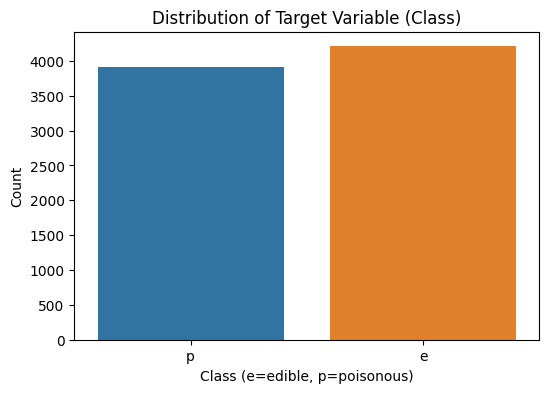

           Model  Accuracy_Full  Accuracy_Important
0  Random Forest       1.000000            1.000000
1            SVC       0.992615            0.978462
2           k-NN       0.996308            1.000000


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (You'll need to upload the dataset to Colab)
df = pd.read_csv('mushrooms.csv')

# Data Understanding
## Basic EDA
df.describe(include='all')
df.isnull().sum()
df.dtypes

## Visualizing the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class (e=edible, p=poisonous)')
plt.ylabel('Count')
plt.show()

# Data Preparation
## Label Encoding
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## Data Splitting
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
sfm = SelectFromModel(rf)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Modeling
## Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC()
knn = KNeighborsClassifier()

## Train and Evaluate Models
models = [rf, svc, knn]
model_names = ['Random Forest', 'SVC', 'k-NN']
model_performance = {'Model': [], 'Accuracy_Full': [], 'Accuracy_Important': []}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_full = model.predict(X_test)
    acc_full = accuracy_score(y_test, y_pred_full)

    model.fit(X_important_train, y_train)
    y_pred_imp = model.predict(X_important_test)
    acc_imp = accuracy_score(y_test, y_pred_imp)

    model_performance['Model'].append(name)
    model_performance['Accuracy_Full'].append(acc_full)
    model_performance['Accuracy_Important'].append(acc_imp)

model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)
